In [1]:
from influxdb import DataFrameClient
import pandas as pd
import os
%matplotlib inline

In [5]:
# os.environ["influx_pw"] = "password" #doesn't work on windows
# os.environ['influx_user'] = 'uname' #doesn't work on windows

In [6]:
db = DataFrameClient(host = '192.168.1.24', username = 'admin', password =os.environ.get("influx_pw"))

In [7]:
db.get_list_database()

[{'name': '_internal'}, {'name': 'home_assistant'}, {'name': 'glances'}]

In [10]:
timeFilter = 'time >= 1577382826582ms and time <= 1577398809205ms'# Specific duration where I ran Sous Vide without inturruption 

In [43]:
temp = db.query(f'SELECT mean("value") as temp FROM "°F" WHERE ("entity_id" =~ /su/) AND {timeFilter} GROUP BY time(15s), "entity_id" fill(previous);',database='home_assistant')
state = db.query(f'SELECT mean("value")*100 as heat_state FROM "state" WHERE ("entity_id" =~ /suviderelay/) AND {timeFilter} GROUP BY time(15s) fill(previous);',database='home_assistant')


In [44]:
flat_state = state['state']
#flat_temp.rename(columns={"mean": "a", "B": "c"}, axis = 1)
flat_temp = temp[('°F', (('entity_id', 'su_vide_temp'),))]
#flat_temp.rename(['temp'], axis = 1)

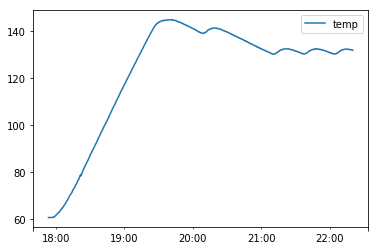

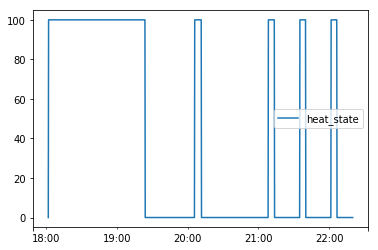

In [45]:
flat_temp.plot()
flat_state.plot()

In [48]:
mergedDF = pd.concat([flat_temp, flat_state.fillna(100)], axis=1) # all of the NA's come from the fact that I turned the heater on before thsi time step, so we need to fill with 1's

In [67]:
mergedDF.reset_index()

,index,temp,heat_state
0,2019-12-26 17:53:45+00:00,60.800,100.0
1,2019-12-26 17:54:00+00:00,60.800,100.0
2,2019-12-26 17:54:15+00:00,60.800,100.0
3,2019-12-26 17:54:30+00:00,60.800,100.0
4,2019-12-26 17:54:45+00:00,60.800,100.0
5,2019-12-26 17:55:00+00:00,60.800,100.0
6,2019-12-26 17:55:15+00:00,60.800,100.0
7,2019-12-26 17:55:30+00:00,60.800,100.0
8,2019-12-26 17:55:45+00:00,60.800,100.0
9,2019-12-26 17:56:00+00:00,60.800,100.0


In [51]:
mergedDF.to_csv('../data/sous_vide_run_1.csv')

In [65]:
checkWrite = pd.read_csv('../data/sous_vide_run_1.csv',parse_dates=True)

In [61]:
pd.to_datetime(checkWrite.index, infer_datetime_format=True)

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000001056',
               '1970-01-01 00:00:00.000001057',
               '1970-01-01 00:00:00.000001058',
               '1970-01-01 00:00:00.000001059',
               '1970-01-01 00:00:00.000001060',
               '1970-01-01 00:00:00.000001061',
               '1970-01-01 00:00:00.000001062',
               '1970-01-01 00:00:00.000001063',
               '1970-01-01 00:00:00.000001064',
               '1970-01-01 00:00:00.000001065'],
              dtype=

In [63]:
checkWrite

,Unnamed: 0,temp,heat_state
0,2019-12-26 17:53:45+00:00,60.800,100.0
1,2019-12-26 17:54:00+00:00,60.800,100.0
2,2019-12-26 17:54:15+00:00,60.800,100.0
3,2019-12-26 17:54:30+00:00,60.800,100.0
4,2019-12-26 17:54:45+00:00,60.800,100.0
5,2019-12-26 17:55:00+00:00,60.800,100.0
6,2019-12-26 17:55:15+00:00,60.800,100.0
7,2019-12-26 17:55:30+00:00,60.800,100.0
8,2019-12-26 17:55:45+00:00,60.800,100.0
9,2019-12-26 17:56:00+00:00,60.800,100.0
